In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

In [3]:
# Loading the dataset
def df(file_path):
    """Load dataset fron a csv file"""
    return pd.read_csv(file_path)

df = df("https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv")

df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.describe(include="all")

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [5]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
# Get the shape of the DataFrame (rows, columns)
rows, columns = df.shape

# Print the number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 25480
Number of columns: 12


In [7]:
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None

Missing Values:
case_id                  0
continent                0
education_of_emplo

In [8]:
print("\nSample:")
print(df.head())



Sample:
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1      

In [9]:
print(df.duplicated().sum())

0


In [10]:
 # Drop case_id
if 'case_id' in df.columns:
    df.drop('case_id', axis=1, inplace=True)

In [11]:
# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [12]:
# Remove duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)


Shape after removing duplicates: (25480, 11)


In [13]:
# Fix data types
df['no_of_employees'] = df['no_of_employees'].abs() 
df['yr_of_estab'] = df['yr_of_estab'].astype(int)

print(f"Cleaned Shape: {df.shape}")
print("Missing values after cleaning:", df.isnull().sum().sum())


Cleaned Shape: (25480, 11)
Missing values after cleaning: 0


### EXPLORATORY DATA ANALYSIS (EDA)

In [14]:
df.describe()


,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [23]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 30)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
------------------------------
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
------------------------------
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
------------------------------



EDA - Distributions


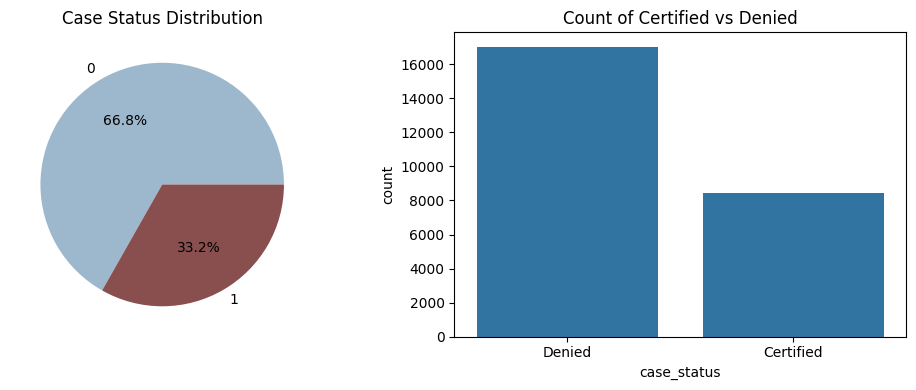

In [15]:
def EDA_distributions(df):
    """Distribution of features and target"""
    print("\nEDA - Distributions")

    target = 'case_status'
    le = LabelEncoder()
    df[target] = le.fit_transform(df[target])
    
    # Target distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    df[target].value_counts().plot.pie(autopct='%1.1f%%', colors=["#9DB8CC","#894F4F"])
    plt.title('Case Status Distribution')
    plt.ylabel('')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=target, data=df)
    plt.title('Count of Certified vs Denied')
    plt.xticks([0,1], ['Denied', 'Certified'])
    plt.tight_layout()
    plt.show()
EDA_distributions(df)

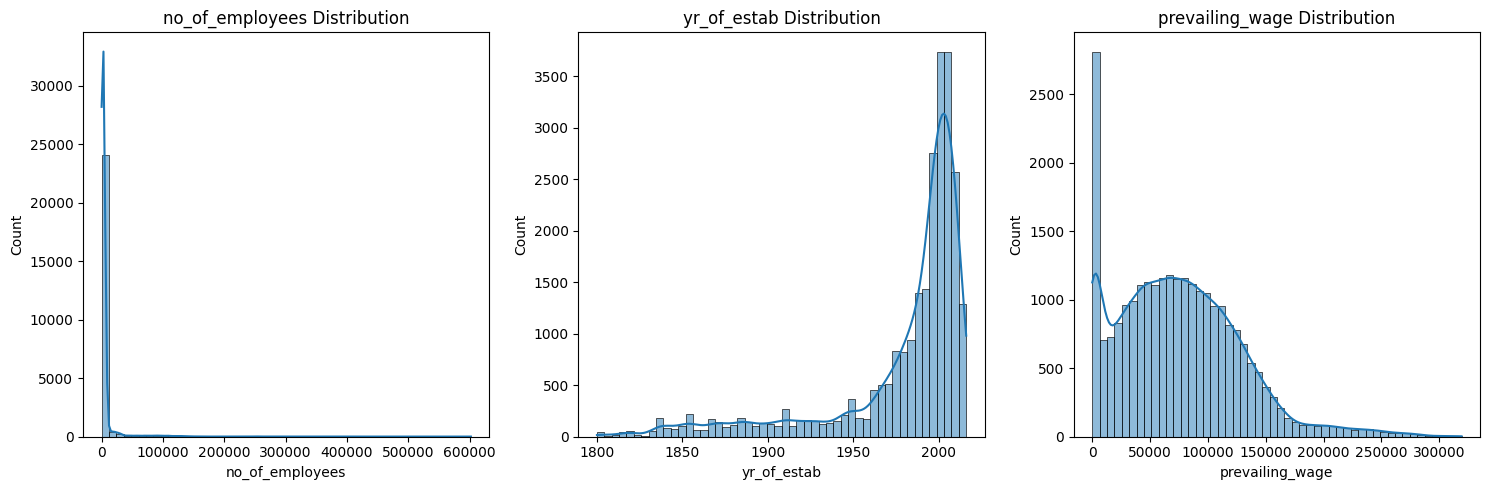

In [16]:
# Numerical features
num_cols = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()
print("\n")

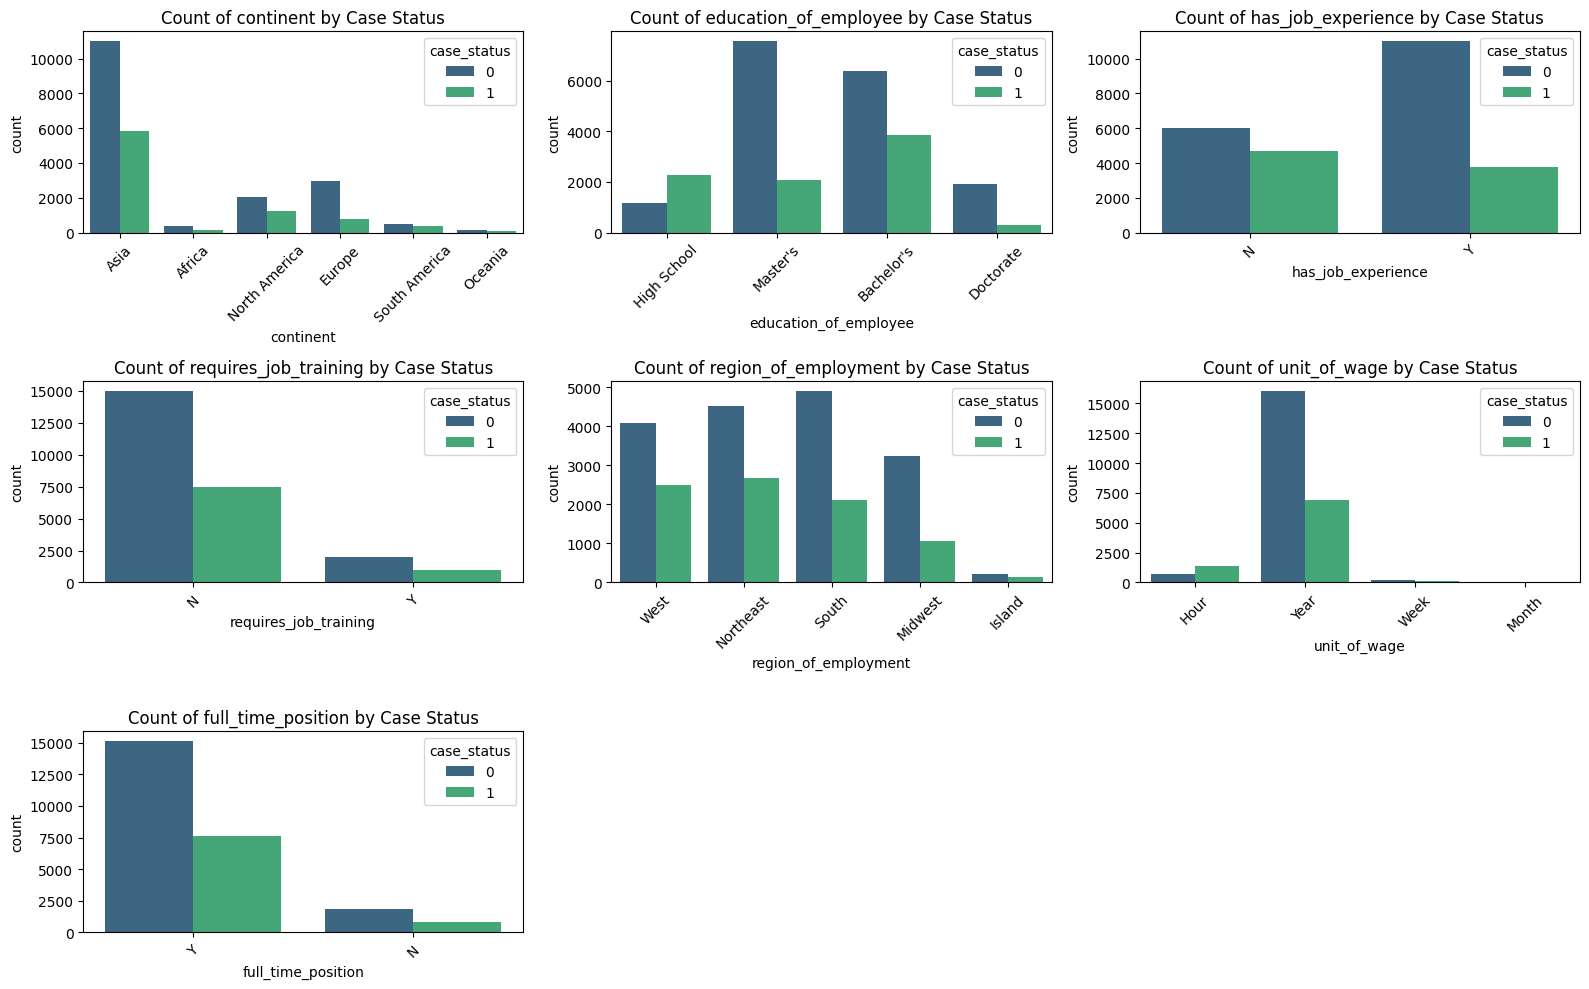

In [17]:
 # Categorical features
cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
            'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']
plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='case_status', data=df, palette='viridis')
    plt.title(f'Count of {col} by Case Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")


Feature vs Target Relationships


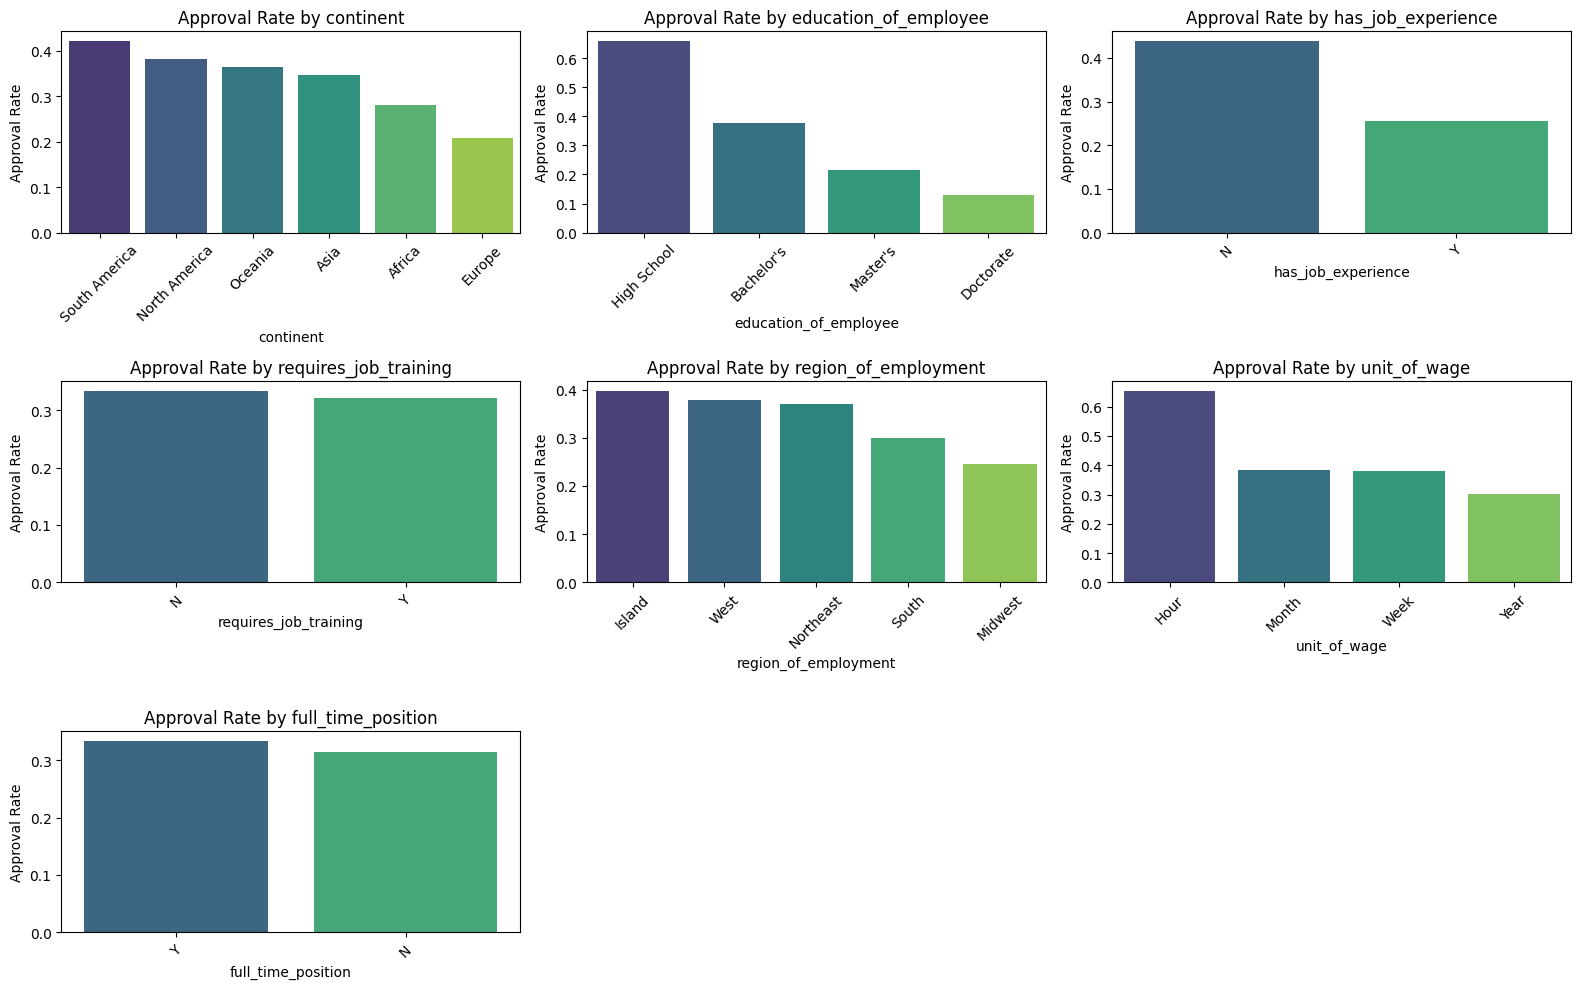

In [18]:
def EDA_relationships(df):
    """Visualize relationships with target"""
    print("\nFeature vs Target Relationships")
    
    target = 'case_status'
    cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
                'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']
    
    plt.figure(figsize=(16, 10))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(3, 3, i)
        approval_rate = df.groupby(col)[target].mean().sort_values(ascending=False)
        sns.barplot(x=approval_rate.index, y=approval_rate.values, palette='viridis')
        plt.title(f'Approval Rate by {col}')
        plt.ylabel('Approval Rate')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
EDA_relationships(df)
    

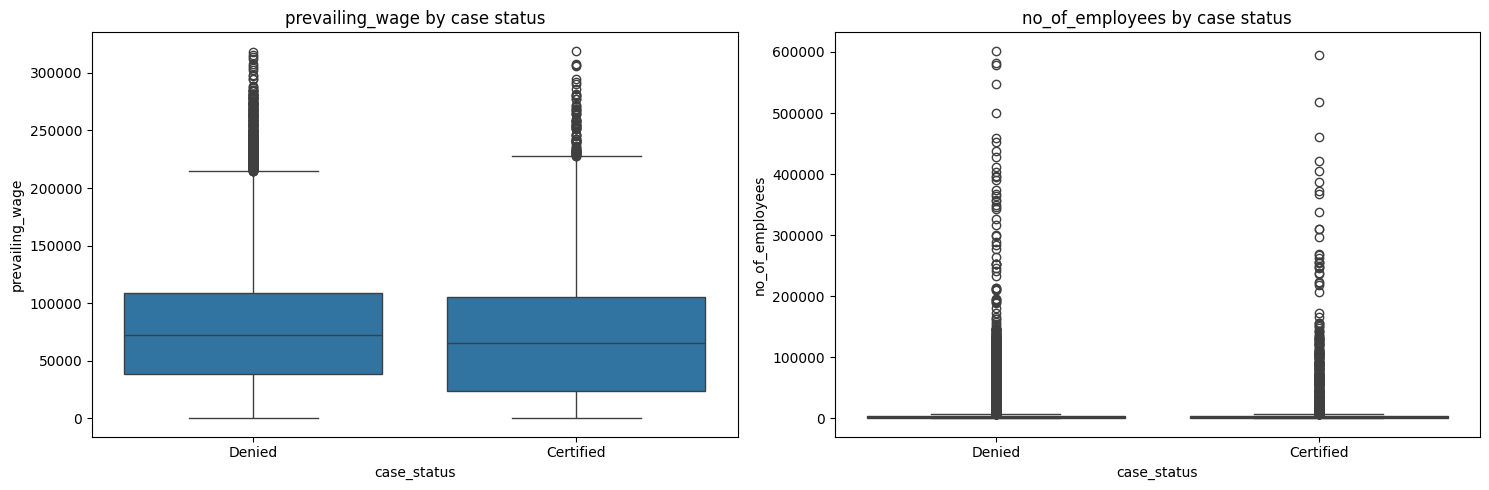

In [19]:
# Box plots for numerical
target = 'case_status'
plt.figure(figsize=(15, 5))
for i, col in enumerate(['prevailing_wage', 'no_of_employees'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} by case status')
    plt.xticks([0,1], ['Denied', 'Certified'])
plt.tight_layout()
plt.show()
print("\n")

In [20]:
def handle_outliers(df):
    """Identify and cap outliers"""
    print("\nOutlier Treatment")
    
    # Cap prevailing_wage and no_of_employees at 99th percentile
    for col in ['prevailing_wage', 'no_of_employees']:
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(upper=upper)
        print(f"{col}: capped at 99th percentile = {upper:.2f}")
        print("\n")
handle_outliers(df)


Outlier Treatment
prevailing_wage: capped at 99th percentile = 238215.45


no_of_employees: capped at 99th percentile = 102767.00




In [21]:


# # ====================== PHASE 3: FEATURE ENGINEERING ======================
# def engineer_features(df):
#     df = df.copy()
#     current_year = 2025
#     df['company_age'] = current_year - df['yr_of_estab']
#     wage_map = {'Hourly': 2080, 'Weekly': 52, 'Monthly': 12, 'Yearly': 1}
#     df['hours_per_year'] = df['unit_of_wage'].map(wage_map)
#     df['annual_wage'] = df['prevailing_wage'] * df['hours_per_year']
#     # Drop old columns
#     df.drop(['prevailing_wage', 'unit_of_wage', 'yr_of_estab', 'hours_per_year'], axis=1, inplace=True)
#     return df
# def encode_and_scale(df, target='case_status'):
#     df = df.copy()
#     # Label encode target
#     le = LabelEncoder()
#     df[target] = le.fit_transform(df[target])
#     # One-hot encode categorical
#     cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
#                 'requires_job_training', 'region_of_employment', 'full_time_position']
#     df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#     # Scale numerical
#     num_cols = ['no_of_employees', 'company_age', 'annual_wage']
#     scaler = StandardScaler()
#     df[num_cols] = scaler.fit_transform(df[num_cols])
#     return df, le, scaler, num_cols
# # ====================== PHASE 4: MODELING FUNCTIONS ======================
# def train_evaluate_models(X_train, X_test, y_train, y_test):
#     models = {
#         'Logistic Regression': LogisticRegression(max_iter=1000),
#         'Random Forest': RandomForestClassifier(random_state=42),
#         'Gradient Boosting': GradientBoostingClassifier(random_state=42)
#     }
#     results = {}
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         y_prob = model.predict_proba(X_test)[:, 1]
#         acc = accuracy_score(y_test, y_pred)
#         auc = roc_auc_score(y_test, y_prob)
#         results[name] = {'accuracy': acc, 'auc': auc, 'model': model}
#         print(f"\n=== {name} ===")
#         print(f"Accuracy: {acc:.4f} | AUC: {auc:.4f}")
#         print(classification_report(y_test, y_pred))
#         # Confusion Matrix
#         cm = confusion_matrix(y_test, y_pred)
#         plt.figure(figsize=(5,4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#         plt.title(f'Confusion Matrix - {name}')
#         plt.ylabel('Actual'); plt.xlabel('Predicted')
#         plt.show()
#     return results
# def tune_random_forest(X_train, y_train):
#     param_grid = {
#         'n_estimators': [100, 200],
#         'max_depth': [10, 20, None],
#         'min_samples_split': [2, 5],
#         'min_samples_leaf': [1, 2]
#     }
#     rf = RandomForestClassifier(random_state=42)
#     grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
#     grid.fit(X_train, y_train)
#     print("Best Params:", grid.best_params_)
#     return grid.best_estimator_
# # ====================== PHASE 5: INTERPRETATION ======================
# def plot_feature_importance(model, feature_names, top_n=10):
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=importances[indices][:top_n], y=np.array(feature_names)[indices][:top_n])
#     plt.title(f'Top {top_n} Feature Importances')
#     plt.xlabel('Importance')
#     plt.tight_layout()
#     plt.show()
#     print("Top 5 Features:")
#     for i in range(min(5, top_n)):
#         print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
# # ====================== PHASE 6: GRADIO APP ======================
# def create_gradio_app(model, scaler, feature_names, num_cols):
#     import gradio as gr
#     def predict_visa(continent, education, job_exp, training, employees, estab_year,
#                      region, wage, wage_unit, full_time):
#         # Input dict
#         input_data = {
#             'no_of_employees': [employees],
#             'yr_of_estab': [estab_year],
#             'region_of_employment': [region],
#             'prevailing_wage': [wage],
#             'unit_of_wage': [wage_unit],
#             'full_time_position': [full_time],
#             'continent': [continent],
#             'education_of_employee': [education],
#             'has_job_experience': [job_exp],
#             'requires_job_training': [training]
#         }
#         df_input = pd.DataFrame(input_data)
#         # Feature engineering
#         df_input['company_age'] = 2025 - df_input['yr_of_estab']
#         wage_map = {'Hourly': 2080, 'Weekly': 52, 'Monthly': 12, 'Yearly': 1}
#         df_input['annual_wage'] = df_input['prevailing_wage'] * df_input['unit_of_wage'].map(wage_map)
#         df_input.drop(['prevailing_wage', 'unit_of_wage', 'yr_of_estab'], axis=1, inplace=True)
#         # One-hot encode
#         cat_cols = ['continent', 'education_of_employee', 'has_job_experience',
#                     'requires_job_training', 'region_of_employment', 'full_time_position']
#         df_input = pd.get_dummies(df_input, columns=cat_cols, drop_first=True)
#         # Align with training columns
#         df_input = df_input.reindex(columns=feature_names, fill_value=0)
#         # Scale numerical
#         df_input[num_cols] = scaler.transform(df_input[num_cols])
#         # Predict
#         prob = model.predict_proba(df_input)[0][1]
#         pred = "Certified" if prob >= 0.5 else "Denied"
#         return f"**Prediction:** {pred}\n\n**Confidence:** {prob:.2%}"
#     iface = gr.Interface(
#         fn=predict_visa,
#         inputs=[
#             gr.Dropdown(['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Oceania'], label="Continent"),
#             gr.Dropdown(['High School', "Bachelor's", "Master's", 'Doctorate'], label="Education"),
#             gr.Dropdown(['Y', 'N'], label="Has Job Experience"),
#             gr.Dropdown(['Y', 'N'], label="Requires Training"),
#             gr.Slider(1, 100000, step=1, label="Number of Employees"),
#             gr.Slider(1800, 2025, step=1, label="Year Established"),
#             gr.Dropdown(['Northeast', 'South', 'West', 'Midwest', 'Island'], label="Region"),
#             gr.Number(label="Prevailing Wage"),
#             gr.Dropdown(['Hourly', 'Weekly', 'Monthly', 'Yearly'], label="Wage Unit"),
#             gr.Dropdown(['Y', 'N'], label="Full Time Position")
#         ],
#         outputs=gr.Markdown(),
#         title="US Visa Approval Predictor",
#         description="Predict whether a visa will be **Certified** or **Denied**.",
#         allow_flagging="never"
#     )
#     return iface